# **Generate hypothetical YouTube channel growth metrics**

Kella Eric Mwinwule, Data Analyst/ Machine Learning Enigineer

[*Kella'stech*](https://youtube.com/kella'stech)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate dates for 2 years
start_date = datetime(2019, 8, 19)
end_date = datetime(2024, 9, 15)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Initialize data with zeros
n_days = len(date_range)
data = {
    'DATE': date_range,
    'SUBSCRIBERS_GAINED': np.zeros(n_days, dtype=int),
    'SUBSCRIBERS_LOST': np.zeros(n_days, dtype=int),
    'VIEWS': np.zeros(n_days, dtype=int),
    'WATCH_HOURS': np.zeros(n_days, dtype=int),
    'LIKES': np.zeros(n_days, dtype=int),
    'SHARES': np.zeros(n_days, dtype=int),
    'COMMENTS': np.zeros(n_days, dtype=int)
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to generate growth
def generate_growth(start, end, days):
    return np.linspace(start, end, days)

# Generate growth patterns
subscribers_gained = generate_growth(1, 200, n_days)
subscribers_lost = generate_growth(0, 50, n_days)
views = generate_growth(10, 10000, n_days)
watch_hours = generate_growth(1, 1000, n_days)
likes = generate_growth(0, 500, n_days)
shares = generate_growth(0, 100, n_days)
comments = generate_growth(0, 50, n_days)

# Add randomness and ensure integer values
for i, col in enumerate(['SUBSCRIBERS_GAINED', 'SUBSCRIBERS_LOST', 'VIEWS', 'WATCH_HOURS', 'LIKES', 'SHARES', 'COMMENTS']):
    random_factor = np.random.normal(1, 0.1, n_days)  # Mean of 1, standard deviation of 0.1
    df[col] = np.maximum(0, (eval(col.lower()) * random_factor).astype(int))

# Weekend boost
weekend_mask = (df['DATE'].dt.dayofweek >= 5)
df.loc[weekend_mask, ['VIEWS', 'WATCH_HOURS', 'LIKES']] = df.loc[weekend_mask, ['VIEWS', 'WATCH_HOURS', 'LIKES']] * 1.0

# Seasonal variation (higher in summer)
days_in_year = 366  # Account for leap year
summer_boost = np.sin(np.linspace(0, 2*np.pi, days_in_year))
df['VIEWS'] = df['VIEWS'] * (1 + 0.2 * summer_boost[df['DATE'].dt.dayofyear - 1])

# Occasional viral videos (once every 2 months on average, starting from the second month)
viral_days = np.random.choice(range(30, n_days), size=11, replace=False)
df.loc[viral_days, ['VIEWS', 'LIKES', 'SHARES', 'COMMENTS']] = df.loc[viral_days, ['VIEWS', 'LIKES', 'SHARES', 'COMMENTS']] * 5

# Ensure integer values
for col in df.columns:
    if col != 'DATE':
        df[col] = df[col].astype(int)

# Calculate cumulative subscribers
df['TOTAL_SUBSCRIBERS'] = (df['SUBSCRIBERS_GAINED'] - df['SUBSCRIBERS_LOST']).cumsum()

# Ensure no negative values
df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).clip(lower=0)

# Save to CSV
df.to_csv('youtube_channel_data.csv', index=False)

C:\Users\Kella's IQ\AppData\Local\Temp\ipykernel_10052\4057972416.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[   54.     84.     93.     97.5   129.    190.5   214.5   229.5   285.
   259.5   318.    357.    475.5   414.    460.5   459.    481.5   475.5
   447.    567.    586.5   648.    694.5   669.    658.5   639.    793.5
   640.5   855.    747.    867.    936.   1006.5  1083.    918.    984.
   997.5  1186.5  1113.    975.   1168.5  1027.5  1242.   1224.   1429.5
  1125.   1485.   1396.5  1287.   1411.5  1570.5  1563.   1633.5  1599.
  1837.5  1539.   1674.   1813.5  1857.   1693.5  1693.5  1929.   1969.5
  1954.5  1720.5  1944.   2025.   2013.   2091.   1870.5  1885.5  2430.
  1696.5  2523.   2224.5  2197.5  2566.5  2910.   2697.   2094.   2325.
  1842.   2379.   2494.5  2584.5  2445.   2368.5  2670.   2743.5  2379.
  2824.5  2239.5  2598.   2659.5  2967.   2608.5  2820.   2907.   3099.
  

In [2]:
# Display DataFrame
df

,DATE,SUBSCRIBERS_GAINED,SUBSCRIBERS_LOST,VIEWS,WATCH_HOURS,LIKES,SHARES,COMMENTS,TOTAL_SUBSCRIBERS
0,2019-08-19,1,0,6,1,0,0,0,1
1,2019-08-20,1,0,11,1,0,0,0,2
2,2019-08-21,1,0,17,2,0,0,0,3
3,2019-08-22,1,0,16,2,0,0,0,4
4,2019-08-23,1,0,28,2,0,0,0,5
...,...,...,...,...,...,...,...,...,...
1850,2024-09-11,186,51,7250,821,573,108,43,140393
1851,2024-09-12,235,47,8068,1076,563,89,49,140581
1852,2024-09-13,175,56,7578,907,449,89,45,140700
1853,2024-09-14,218,52,13022,1495,826,92,53,140866


In [3]:
df.describe()

,DATE,SUBSCRIBERS_GAINED,SUBSCRIBERS_LOST,VIEWS,WATCH_HOURS,LIKES,SHARES,COMMENTS,TOTAL_SUBSCRIBERS
count,1855,1855.000000,1855.000000,1855.00000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000
mean,2022-03-03 00:00:00,100.576819,24.546631,5895.20000,571.549865,293.132615,50.526685,25.121294,47375.545013
min,2019-08-19 00:00:00,1.000000,0.000000,6.00000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2020-11-24 12:00:00,50.000000,12.000000,2679.50000,272.500000,139.000000,24.000000,12.000000,9147.500000
50%,2022-03-03 00:00:00,101.000000,24.000000,5432.00000,541.000000,274.000000,50.000000,25.000000,35697.000000
75%,2023-06-09 12:00:00,149.000000,37.000000,8195.00000,822.000000,412.000000,74.000000,37.000000,79731.500000
max,2024-09-15 00:00:00,235.000000,61.000000,64777.00000,1759.000000,3367.000000,495.000000,290.000000,141036.000000
std,NaN,58.953142,14.824717,4698.51224,365.041665,220.075930,34.915250,17.717301,42152.264463


<Axes: >

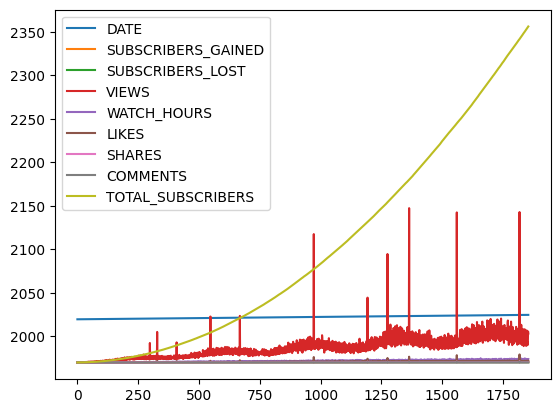

In [4]:
df.plot()